# The Project
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

In [1]:
import zipfile
import os
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')


In [2]:
import os
#os.mkdir('small_img')
local_zip = 'small_img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('small_img')
zip_ref.close()

#os.mkdir('large_img')
local_zip = 'large_img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('large_img')
zip_ref.close()


In [3]:
#list that contains the images names
pages_list=os.listdir('small_img')

Global_list=[]
for page_name in pages_list:
    local_list=[] 
    
    #local list = [ page_name , tesseract_text ] 
    
    local_list.append(page_name)
    img = Image.open('small_img/'+page_name)
    
    local_list.append(pytesseract.image_to_string(img).replace('-\n',''))

    Global_list.append(local_list)


In [4]:
def search(text,folder):
    for local_list in Global_list:
        if text in local_list[1]:
            print('Results found in file',local_list[0])
            
            try:
                img = Image.open(str(folder+local_list[0]))
                faces = (face_cascade.detectMultiScale(np.array(img),1.35,4)).tolist()
                # storing the bounding boxes of all faces detected in each image of iteration
                faces_in_each = []
                
                for x,y,w,h in faces:
                    faces_in_each.append(img.crop((x,y,x+w,y+h)))
                    # modifying local data structure in each iteration to sotre PIL Image of each face
                    # display((img.crop((x,y,x+w,y+h))).resize((110,110)))
                
                contact_sheet = Image.new(img.mode, (550,110*int(np.ceil(len(faces_in_each)/5))))
                # Contact sheet modification to display each iteration's result
                x = 0
                y = 0

                for face in faces_in_each:
                    face.thumbnail((110,110))
                   # HINT 4
                    contact_sheet.paste(face, (x, y))
                    
                    if x+110 == contact_sheet.width:
                        x=0
                        y=y+110
                    else:
                        x=x+110
                        
                display(contact_sheet)
            except:
                print('There were no faces in that file!')

Results found in file a-0.png


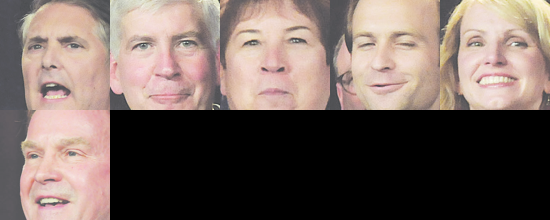

Results found in file a-3.png


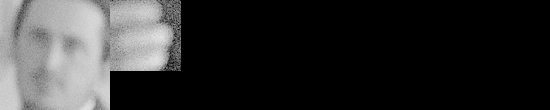

In [5]:
# Using the function (testing with small_img)

search("Christopher",'small_img/')

In [6]:
# Using the function (testing with large_img):

# list that contains the images names
pages_list=os.listdir('large_img')

Global_list=[]
for page_name in pages_list:
    local_list=[] 
    
    #local list = [ page_name , tesseract_text ] 
    
    local_list.append(page_name)
    img = Image.open('large_img/'+page_name)
    
    local_list.append(pytesseract.image_to_string(img).replace('-\n',''))

    Global_list.append(local_list)

Results found in file a-2.png


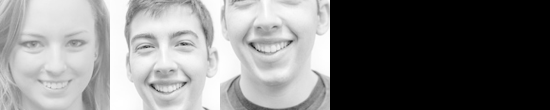

Results found in file a-10.png
There were no faces in that file!
Results found in file a-0.png


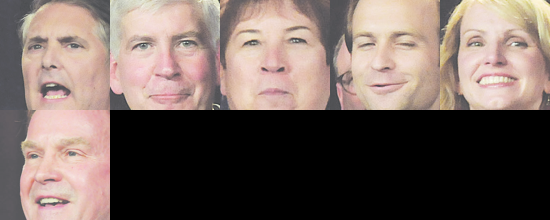

Results found in file a-13.png


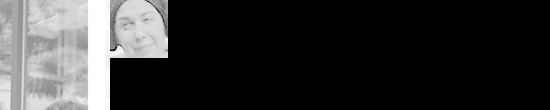

Results found in file a-8.png
There were no faces in that file!
Results found in file a-3.png


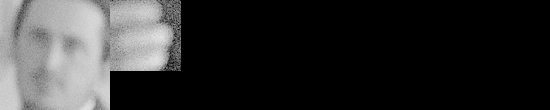

Results found in file a-1.png


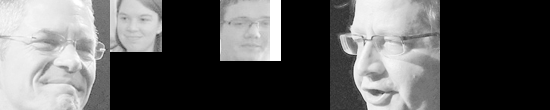

In [7]:
# Searching for Mark:

search(text="Mark",folder='large_img/')